In [25]:
#https://www.kaggle.com/datasets/xcherry/games-of-all-time-from-metacritic

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('games_of_all_time.csv')

In [27]:
df.head()

,game_name,meta_score,user_score,platform,description,url,developer,genre,type,rating
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",https://www.metacritic.com/game/nintendo-64/th...,Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,https://www.metacritic.com/game/wii/super-mari...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",https://www.metacritic.com/game/wii/super-mari...,Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,https://www.metacritic.com/game/gamecube/metro...,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,https://www.metacritic.com/game/switch/super-m...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+


# Let's Clean the Data

In [28]:
df.isnull().sum()

game_name         0
meta_score        0
user_score        0
platform          0
description       0
url               0
developer        10
genre             4
type           2104
rating         1140
dtype: int64

In [29]:
df.describe()

,meta_score,user_score
count,8831.000000,8831.000000
mean,70.876621,69.903918
std,12.181944,13.161456
min,11.000000,2.000000
25%,63.000000,63.000000
50%,73.000000,72.800000
75%,80.000000,79.000000
max,99.000000,98.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8831 entries, 0 to 8830
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   game_name    8831 non-null   object 
 1   meta_score   8831 non-null   float64
 2   user_score   8831 non-null   float64
 3   platform     8831 non-null   object 
 4   description  8831 non-null   object 
 5   url          8831 non-null   object 
 6   developer    8821 non-null   object 
 7   genre        8827 non-null   object 
 8   type         6727 non-null   object 
 9   rating       7691 non-null   object 
dtypes: float64(2), object(8)
memory usage: 690.0+ KB


In [31]:
df.fillna('NULL', inplace = True)

In [32]:
df.isnull().sum()

game_name      0
meta_score     0
user_score     0
platform       0
description    0
url            0
developer      0
genre          0
type           0
rating         0
dtype: int64

In [33]:
df.drop(['url','type'],axis = 1, inplace = True)

In [34]:
df.head()

,game_name,meta_score,user_score,platform,description,developer,genre,rating
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",Nintendo,"['Action Adventure', 'Fantasy']",E
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,Nintendo,"['Action', 'Platformer', '3D']",E
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",E
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",T
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,Nintendo,"['Action', 'Platformer', '3D']",E10+


# Some EDA Action

In [35]:
df[['genre','platform']]

,genre,platform
0,"['Action Adventure', 'Fantasy']",['nintendo-64']
1,"['Action', 'Platformer', '3D']",['wii']
2,"['Action', 'Platformer', '3D']",['wii']
3,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",['gamecube']
4,"['Action', 'Platformer', '3D']",['switch']
...,...,...
8826,"['Action', 'Shooter', 'Third-Person', 'Modern']","['xbox', 'playstation-2']"
8827,"['Driving', 'Racing', 'Arcade', 'Automobile']",['pc']
8828,"['Action', 'General', 'Arcade']",['xbox-one']
8829,"['Miscellaneous', 'General']",['wii']


In [36]:
def find_minmax(x):
    min_index = df[x].idxmin()
    high_index = df[x].idxmax()
    high = pd.DataFrame(df.loc[high_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    
    print('Game with the Highest '+ x + ':',df['game_name'][high_index])
    print('Game with the Lowest '+ x + ':',df['game_name'][min_index])
    return pd.concat([high,low],axis = 1)

find_minmax('meta_score')

Game with the Highest meta_score: The Legend of Zelda: Ocarina of Time
Game with the Lowest meta_score: Family Party: 30 Great Games Obstacle Arcade


,0,4258
game_name,The Legend of Zelda: Ocarina of Time,Family Party: 30 Great Games Obstacle Arcade
meta_score,99.0,11.0
user_score,91.0,22.0
platform,['nintendo-64'],['wii-u']
description,"As a young boy, Link is tricked by Ganondorf, ...",Family Party: 30 Great Games Obstacle Arcade b...
developer,Nintendo,"Art Co., Ltd."
genre,"['Action Adventure', 'Fantasy']","['Miscellaneous', 'Party', 'Party / Minigame']"
rating,E,E


In [37]:
# Find the Highest and Lowest User Score
# Use the same previous function minmax()
find_minmax('user_score')

Game with the Highest user_score: After Burner Climax
Game with the Lowest user_score: Madden NFL 21


,4340,3133
game_name,After Burner Climax,Madden NFL 21
meta_score,72.0,63.0
user_score,98.0,2.0
platform,['xbox-360'],['playstation-4']
description,The classic arcade game After Burner has now r...,Innovative new gameplay mechanics in Madden NF...
developer,Sega AM2,EA Sports
genre,"['Simulation', 'Flight', 'Modern Jet', 'Combat']","['Sports', 'Team', 'Football', 'Sim']"
rating,E10+,E


In [38]:
df['developer'].value_counts()

Capcom            150
Nintendo          130
Telltale Games    104
Konami             86
Square Enix        76
                 ... 
Starcolt            1
Hot Lava Games      1
V1 Interactive      1
BeeWorks            1
Kenny Creanor       1
Name: developer, Length: 2928, dtype: int64

In [39]:
df['platform'].value_counts()

['pc']                                                              1995
['playstation-4']                                                    607
['switch']                                                           509
['playstation-2']                                                    488
['xbox-360']                                                         462
                                                                    ... 
['xbox-360', 'wii', '3ds', 'playstation-vita']                         1
['pc', 'xbox-360', 'playstation-3', 'wii', 'ds']                       1
['switch', 'xbox-series-x', 'pc', 'playstation-4']                     1
['xbox', 'gamecube', 'pc']                                             1
['xbox-360', 'xbox-one', 'ds', 'playstation-3', 'playstation-4']       1
Name: platform, Length: 506, dtype: int64

# Visualization

**Top 10 Games**

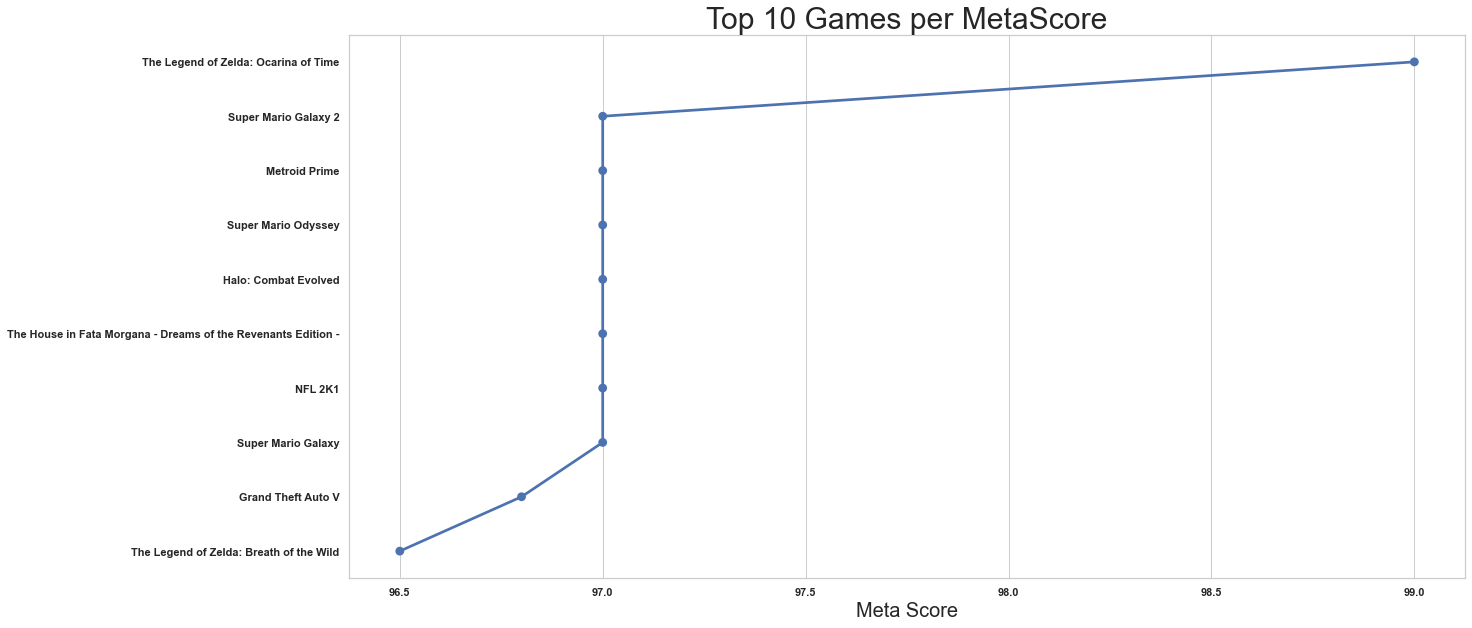

In [40]:
info = pd.DataFrame(df['meta_score'].sort_values(ascending=False))
info['game_name'] = df['game_name']
data = list(map(str,(info['game_name'])))
x = list(data[:10])
y = list(info['meta_score'][:10])

ax = sns.pointplot(x=y,y=x)

sns.set(rc={'figure.figsize':(20,10)})
ax.set_title('Top 10 Games per MetaScore', fontsize = 30)
ax.set_xlabel('Meta Score',fontsize = 20)
sns.set_style('darkgrid')

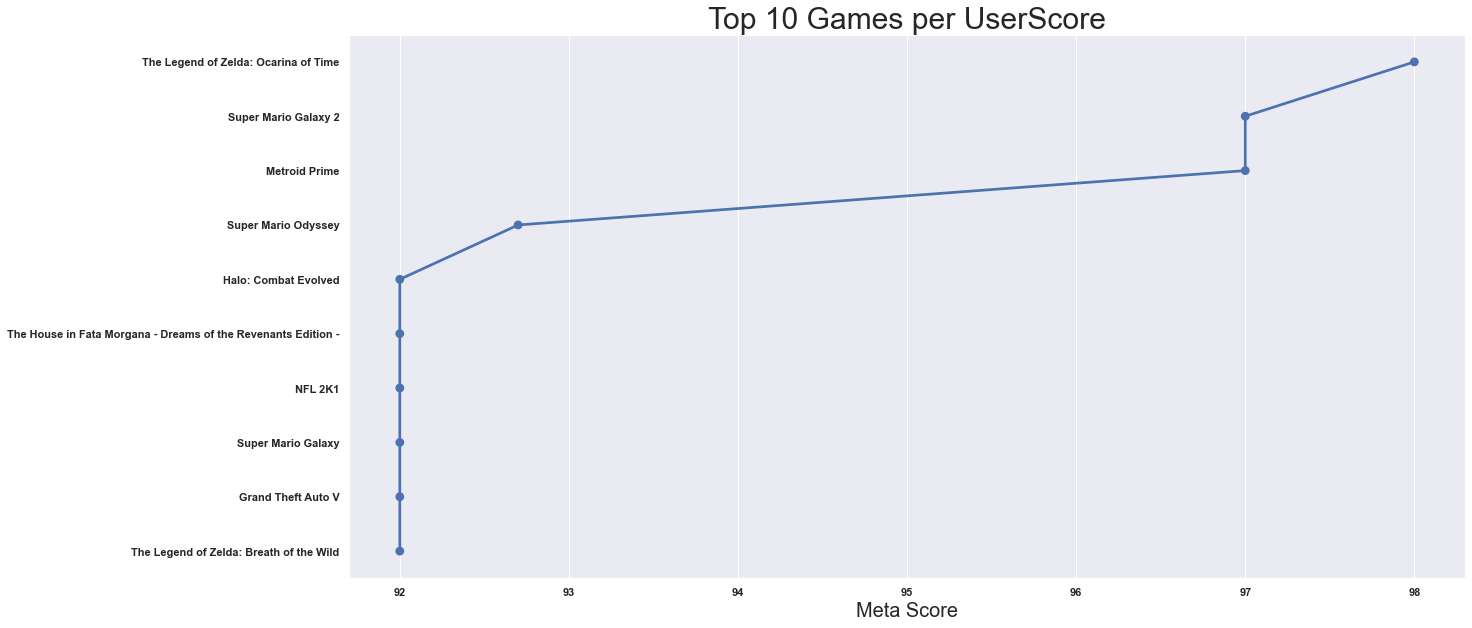

In [41]:
info1 = pd.DataFrame(df['user_score'].sort_values(ascending=False))
info1['game_name'] = df['game_name']
data1 = list(map(str,(info['game_name'])))
x = list(data1[:10])
y = list(info1['user_score'][:10])

ax = sns.pointplot(x=y,y=x)

sns.set(rc={'figure.figsize':(20,10)})
ax.set_title('Top 10 Games per UserScore', fontsize = 30)
ax.set_xlabel('Meta Score',fontsize = 20)
sns.set_style('darkgrid')

**Top 10 Developers by MetaScore**

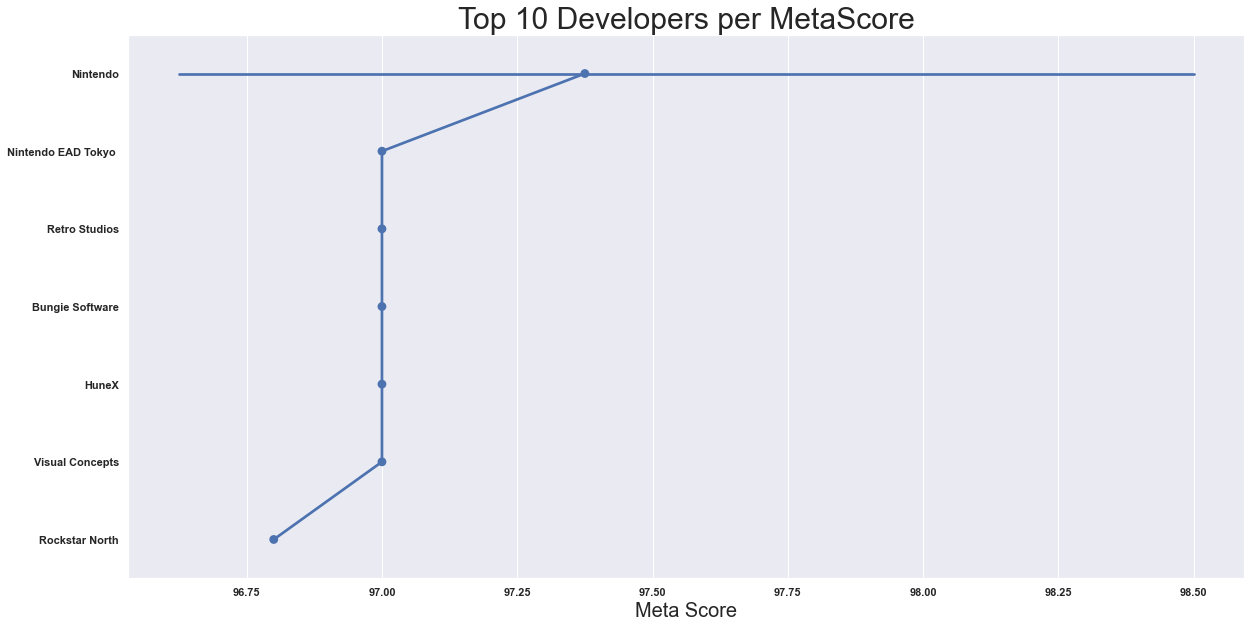

In [42]:
info = pd.DataFrame(df['meta_score'].sort_values(ascending=False))
info['developer'] = df['developer']
data = list(map(str,(info['developer'])))
x = list(data[:10])
y = list(info['meta_score'][:10])

ax = sns.pointplot(x=y,y=x)

sns.set(rc={'figure.figsize':(20,10)})
ax.set_title('Top 10 Developers per MetaScore', fontsize = 30)
ax.set_xlabel('Meta Score',fontsize = 20)
sns.set_style('darkgrid')

**Top 10 Platforms by MetaScore**

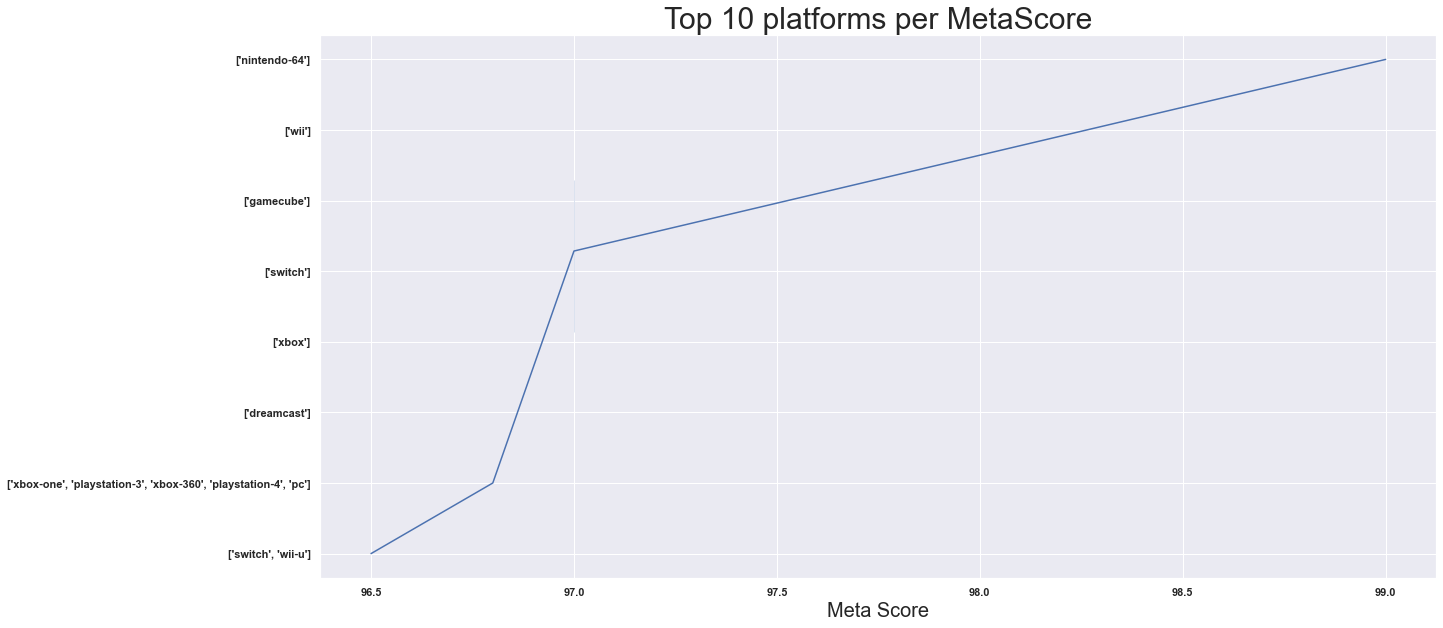

In [43]:
info = pd.DataFrame(df['meta_score'].sort_values(ascending=False))
info['platform'] = df['platform']
data = list(map(str,(info['platform'])))
x = list(data[:10])
y = list(info['meta_score'][:10])

ax = sns.lineplot(x=y,y=x)

sns.set(rc={'figure.figsize':(20,10)})
ax.set_title('Top 10 platforms per MetaScore', fontsize = 30)
ax.set_xlabel('Meta Score',fontsize = 20)
sns.set_style('darkgrid')

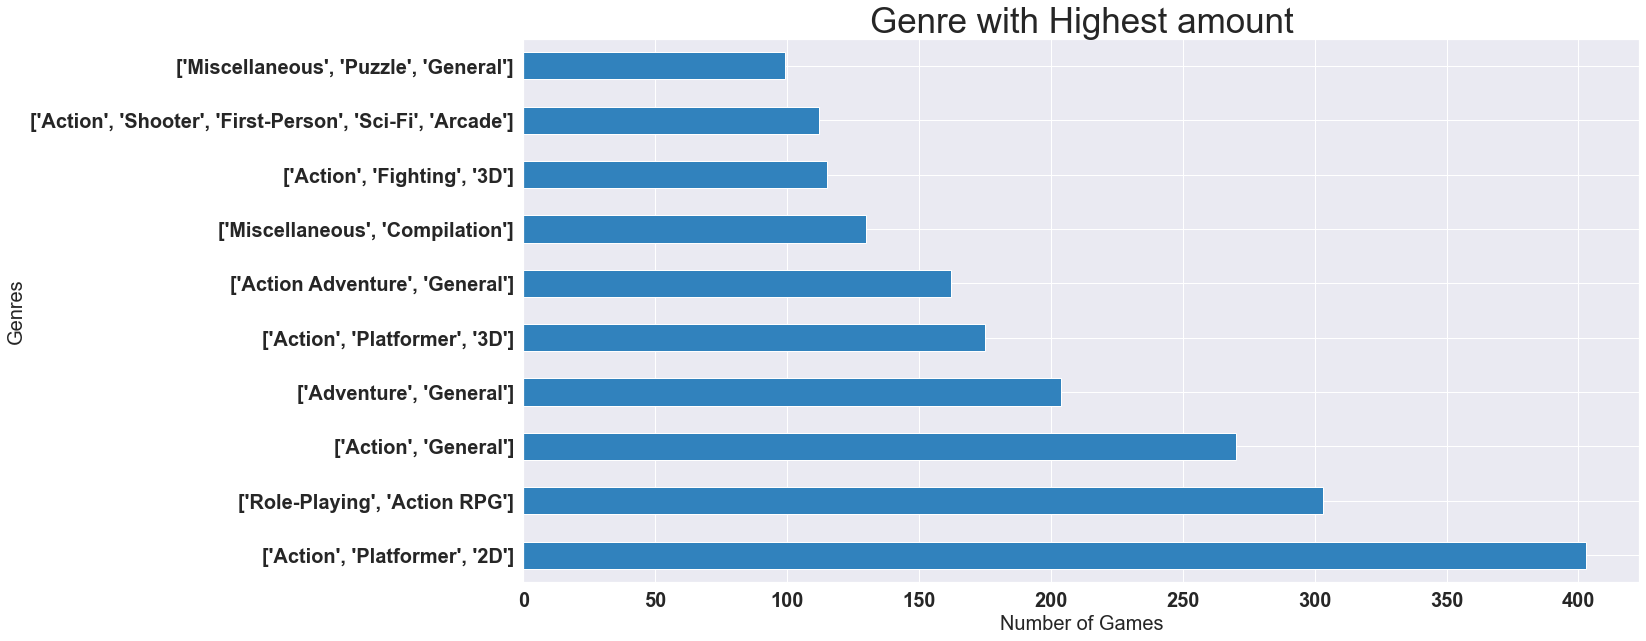

In [44]:
# Make a function that will split the string 
# and return a count of each genre
def count_genre(x):
    # Concatenate all the rows of the genre
    data_plot = df[x].str.cat(sep='|')
    data = pd.Series(data_plot.split('|'))
    info = data.value_counts(ascending = False)
    return info

total_genre = count_genre('genre')[:10]
total_genre.plot(kind='barh',figsize=(20,10),
                fontsize=20, colormap = 'tab20c')
plt.title('Genre with Highest amount', fontsize = 35)
plt.xlabel('Number of Games', fontsize = 20)
plt.ylabel('Genres', fontsize = 20)
sns.set_style('whitegrid')

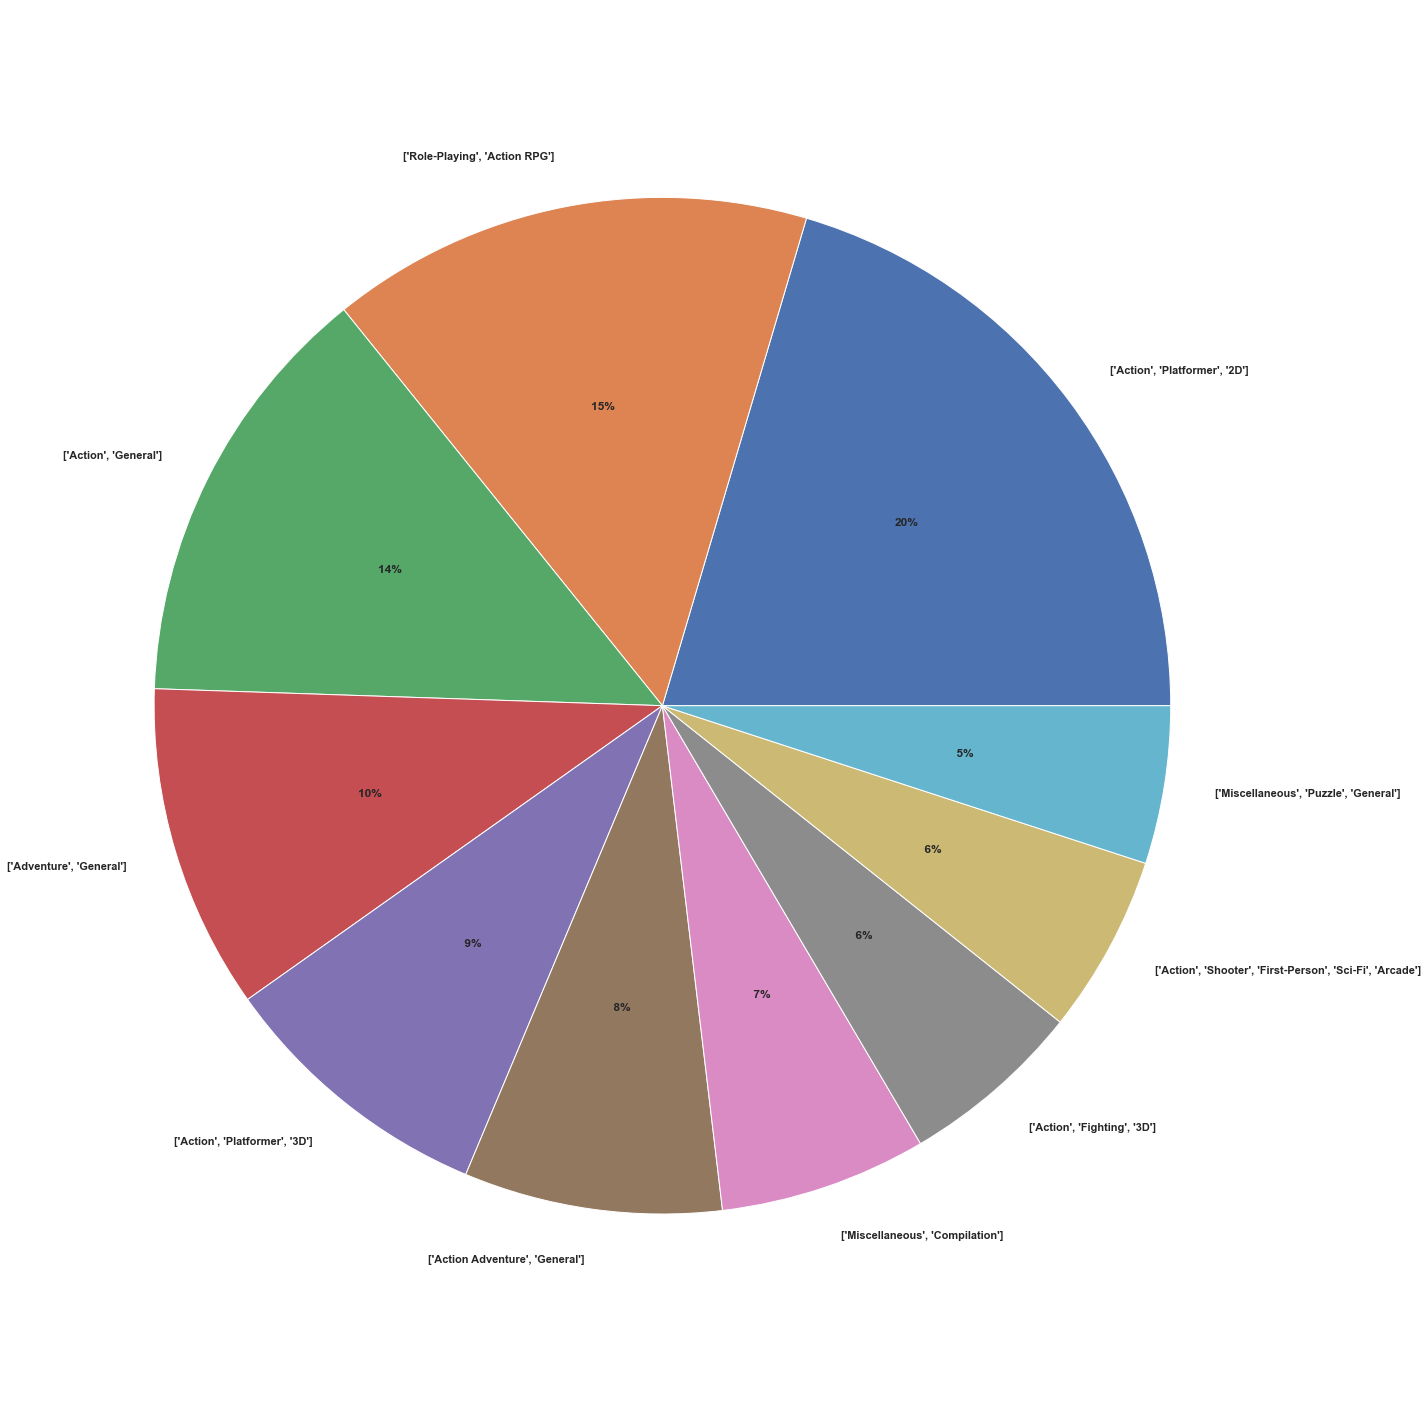

In [45]:
# will make a pie chart for genre's 
i = 0
genre_count = []
for genre in total_genre.index:
    genre_count.append([genre,total_genre[i]])
    i = i+1
    
plt.rc('font', weight = 'bold')
f, ax = plt.subplots(figsize = (20,20))
genre_count.sort(key = lambda x:x[1],reverse=True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels = labels_selected, autopct = lambda x: '{:2.0f}%'.format(x) if x > 1 else '',shadow=False, startangle=0)
ax.axis('equal')
plt.tight_layout()

In [46]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['rating'] = labelencoder.fit_transform(df['rating'])
df

,game_name,meta_score,user_score,platform,description,developer,genre,rating
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",Nintendo,"['Action Adventure', 'Fantasy']",1
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,Nintendo,"['Action', 'Platformer', '3D']",1
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",1
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",7
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,Nintendo,"['Action', 'Platformer', '3D']",2
...,...,...,...,...,...,...,...,...
8826,kill.switch,74.0,80.5,"['xbox', 'playstation-2']","In a world on the brink of global conflict, yo...",Namco,"['Action', 'Shooter', 'Third-Person', 'Modern']",7
8827,nail'd,69.0,76.0,['pc'],nail’d is all about eschewing boring realism f...,Techland,"['Driving', 'Racing', 'Arcade', 'Automobile']",2
8828,oOo: Ascension,70.0,73.0,['xbox-one'],oOo: Ascension is a lightning-paced test of re...,Kenny Creanor,"['Action', 'General', 'Arcade']",1
8829,uDraw Studio,71.0,71.0,['wii'],"Packaged with the uDraw GameTablet, uDraw Stud...",THQ,"['Miscellaneous', 'General']",1


C:\Users\chamj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<module 'seaborn' from 'C:\\Users\\chamj\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

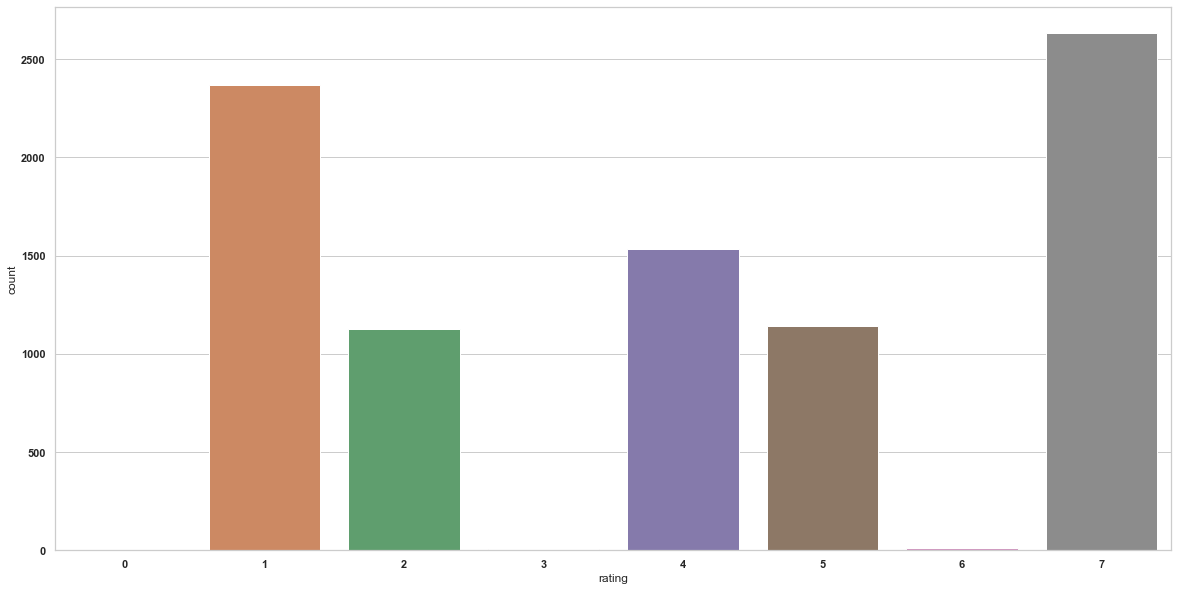

In [47]:
class_label  = "rating"  

sns.countplot(df[class_label],label="Count")
sns

In [50]:
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
try:
    from sklearn.model_selection import train_test_split
except:
    from sklearn.cross_validation import train_test_split

In [51]:
df_x=df["description"]
df_y= df["rating"]
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=4)

In [52]:
TfIDFrame = TfidfVectorizer(max_features = 10000)
docs_train_tfidf = TfIDFrame.fit_transform(x_train)
docs_test_tfidf = TfIDFrame.transform(x_test)

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn
import seaborn as sb

Training Accuracy 0.7214043035107588
0.49245283018867925
              precision    recall  f1-score   support

           1       0.53      0.73      0.61       714
           2       0.26      0.23      0.25       338
           3       0.00      0.00      0.00         2
           4       0.56      0.51      0.54       466
           5       0.31      0.14      0.19       339
           6       0.00      0.00      0.00         5
           7       0.54      0.54      0.54       786

    accuracy                           0.49      2650
   macro avg       0.31      0.31      0.30      2650
weighted avg       0.47      0.49      0.47      2650

[[518  50   0  24  22   0 100]
 [142  79   0  25  12   0  80]
 [  2   0   0   0   0   0   0]
 [ 56  37   0 239  30   0 104]
 [113  44   0  58  47   0  77]
 [  3   1   0   1   0   0   0]
 [150  95   0  80  39   0 422]]


C:\Users\chamj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chamj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chamj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Wall time: 7.01 s


<AxesSubplot:>

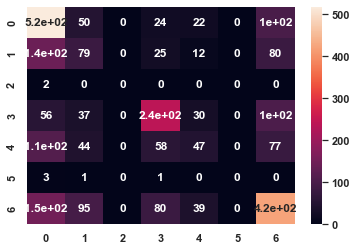

In [58]:
%%time
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(algorithm='auto',
                                leaf_size=5,
                                metric='minkowski',
                                metric_params=None,
                                n_jobs=1,
                                n_neighbors=3,
                                weights='uniform',
                                )
classifier.fit(docs_train_tfidf,y_train)
print("Training Accuracy", classifier.score(docs_train_tfidf,y_train))
pred=classifier.predict(docs_test_tfidf)
accuracy=sklearn.metrics.accuracy_score(y_test, pred)
print(accuracy)
report = classification_report(y_test, pred)
confMat = confusion_matrix(y_test, pred)
print(report)
print(confMat)
plt.figure(figsize = (6,4))
sb.heatmap(confMat, annot=True,)